In [11]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model as lm

pandas.set_option("display.precision", 2)

datafile = '../../Data/Raw/airbnb/airbnb_queens_2019.csv'
# datafile = '../mit_ds_course/Data/Raw/wine/winequality-red.csv'


test_var = 'number_of_reviews'

classifier_variables = ['price', 'reviews_per_month']
target_variable = ['room_type']


analysis_variables = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                      'reviews_per_month', 'calculated_host_listings_count','availability_365']

# Load Data 

In [2]:
data = pandas.read_csv(datafile, sep=',')
print(data.shape)
print(data.columns)
data.head()

(5666, 16)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.75,-73.95,Private room,130,3,248,01-07-19,2.25,1,215
1,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75,-73.90,Private room,70,30,25,31-05-19,0.22,1,324
2,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74,-73.83,Private room,140,2,1,19-09-11,0.01,1,1
3,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.75,-73.92,Private room,79,30,28,12-04-19,0.26,1,126
4,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70,-73.90,Entire home/apt,350,8,10,12-05-19,0.11,5,365


# Descrição dos Dados

In [3]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.67e+03,5.67e+03,5666.00,5666.00,5666.00,5666.00,5666.00,4574.00,5666.00,5666.00
mean,2.18e+07,9.62e+07,40.73,-73.87,99.52,5.18,27.70,1.94,4.06,144.45
std,1.04e+07,8.42e+07,0.04,0.06,167.10,15.03,51.96,2.21,12.45,135.54
min,1.29e+04,3.21e+03,40.57,-73.96,10.00,1.00,0.00,0.01,1.00,0.00
25%,1.40e+07,2.12e+07,40.71,-73.92,50.00,1.00,1.00,0.37,1.00,2.00
50%,2.26e+07,6.83e+07,40.74,-73.90,75.00,2.00,7.00,1.21,1.00,98.00
75%,3.08e+07,1.58e+08,40.76,-73.83,110.00,3.00,32.00,2.79,3.00,286.00
max,3.65e+07,2.74e+08,40.80,-73.71,10000.00,500.00,629.00,20.94,103.00,365.00


# Filtering Variables 

In [4]:
data = data[analysis_variables + target_variable].copy()
n_classes = data[target_variable].nunique().values[0]

# Normalização de dados 

## Standard Scaling

C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


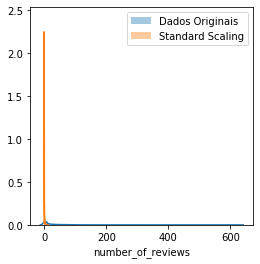

In [12]:
scaler = preprocessing.StandardScaler()
scaler.fit(data[analysis_variables])
std_normed_data = pandas.DataFrame(scaler.transform(data[analysis_variables]),
                                   columns=analysis_variables)

# Plot distributions
plt.figure(figsize=(4,4))
sns.distplot(data[test_var], label='Dados Originais', )
sns.distplot(std_normed_data[test_var], label='Standard Scaling')
plt.legend()


## Normalização por Min/Max 

C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


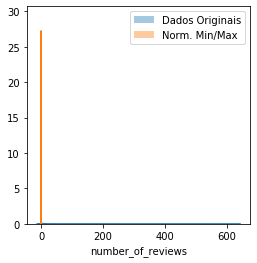

In [13]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(data[analysis_variables])
minmax_normed_data = pandas.DataFrame(scaler.transform(data[analysis_variables]), 
                                      columns=[analysis_variables])

# Plot distributions
plt.figure(figsize=(4,4))
sns.distplot(data[test_var], label='Dados Originais', )
sns.distplot(minmax_normed_data[test_var], label='Norm. Min/Max')
plt.legend()

# Normalização Logarítmica

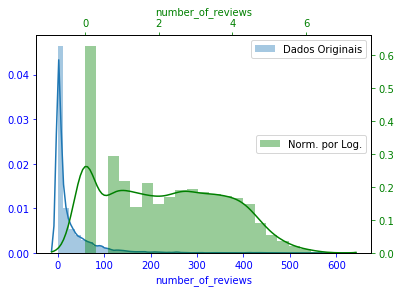

In [14]:

normed_data = data.copy()
normed_data[test_var] = np.log1p(data[test_var])

# Plot distributions
plt.figure(figsize=(6,4))
sns.distplot(data[test_var], label='Dados Originais', )
ax = plt.gca()
ax.xaxis.label.set_color('b')
ax.tick_params(axis='x', colors='b')
ax.tick_params(axis='y', colors='b')

ax2 = ax.twinx()
ax3 = ax2.twiny()
sns.distplot(normed_data[test_var],color='g', label='Norm. por Log.')
ax3.xaxis.label.set_color('g')
ax3.tick_params(axis='x', colors='g')
ax2.tick_params(axis='y', colors='g')
ax.legend()
ax3.legend(loc='center right')


# Estimativa de valor médio

Qual é o Índice médio de acidez de vinhos tintos?

In [15]:
n = 200
print('Preço médio: %.2f'%data[test_var].mean())
print('\t1)Preço médio amostral (',n,'): %.2f'%data.sample(n)[test_var].mean())
print('\t2)Preço médio amostral (',n,'): %.2f'%data.sample(n)[test_var].mean())
print('\t3)Preço médio amostral (',n,'): %.2f'%data.sample(n)[test_var].mean())

Preço médio: 27.70
	1)Preço médio amostral ( 200 ): 28.39
	2)Preço médio amostral ( 200 ): 24.60
	3)Preço médio amostral ( 200 ): 29.89


Calculando a distribuição do valor médio da população para diversos sorteios de amostras. 

Valor médio da amostra  :  27.7619115
Valor médio da população:  27.70031768443346
Erro padrão da amostra  :  3.6237709066203054
Erro padrão estimado    :  3.673833567244531


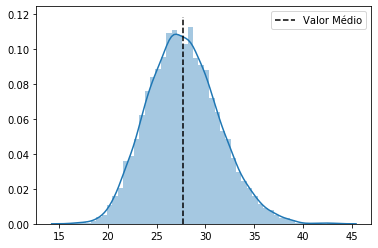

In [16]:
n_test = 10000
n = 200
mean_values = []
for i in range(n_test):
    mean_values.append(data.sample(n)[test_var].mean())
ref_mean_samples = np.array(mean_values)

print('Valor médio da amostra  : ', ref_mean_samples.mean())
print('Valor médio da população: ', data[test_var].mean())
print('Erro padrão da amostra  : ', ref_mean_samples.std())
print('Erro padrão estimado    : ', data[test_var].std() / np.sqrt(n))

# Plot
ax = sns.distplot(ref_mean_samples)
ax.plot([data[test_var].mean(), data[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()


Visualizando o impacto do tamanho da amostra para a estimativa do valor médio.

In [ ]:
n_test = 10000

for ntrial in [10, 100, 200, 500, 1000]:
    mean_values = []
    for i in range(n_test):
        mean_values.append(data.sample(ntrial)[test_var].mean())
    # Plot
    ax = sns.distplot(mean_values, label='#amostra: %i'%ntrial)
ax.plot([data[test_var].mean(), data[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()



Visualizando o impacto da quantidade de testes para a estimativa do valor médio da população. 

In [ ]:
ntrial = 200
for n_test in [10, 100, 500, 1000, 10000]:
    mean_values = []
    for i in range(n_test):
        mean_values.append(data.sample(ntrial)[test_var].mean())
    # Plot
    ax = sns.distplot(mean_values, label='#test: %i'%n_test)
ax.plot([data[test_var].mean(), data[test_var].mean()], ax.axis()[2:],
        '--k', label='Valor Médio')
ax.legend()


# Bootstraping

Método de estimativa de parâmetros de uma população por bootstrapping.

In [ ]:
def meanBootstrap(X, n_trials):
    mean_estimates = []
    for i in range (n_trials):
        sample = [X[j] for j in np.random.randint(len(X), size=len(X))]
    mean_estimates.append(np.mean(sample))
    return mean_estimates

m = meanBootstrap(data[test_var].values, 10000)
print("Valor médio população     :", data[test_var].mean())
print("Estimativa amostral (200) :", data.sample(200)[test_var].mean())
print("Estimativa bootstrap      :", np.mean(m))

# Intervalo de Confiança 

Estimativa do intervalo de confiança por aproximação Normal.

In [ ]:
mean_val = data[test_var].mean()
standard_error = data[test_var].std() / np.sqrt(data.shape[0])
ci = (mean_val - standard_error*1.96, mean_val + standard_error*1.96)
print('Valor médio população : ', mean_val)
print('Média amostral        : ', ref_mean_samples.mean())
print('Intervalo de confiança: ', ci)

ax = sns.distplot(ref_mean_samples)
ax.plot([mean_val, mean_val], ax.axis()[2:], '-k', label='Valor Médio')
ax.plot([ci[0], ci[0]], ax.axis()[2:], '--k', label='Intervalo Confiança')
ax.plot([ci[1], ci[1]], ax.axis()[2:], '--k',)
ax.legend()

# Teste de Hipóteses 

## Por Intervalo de Confiança 

In [ ]:
n_test = 200
ntrial = 200

mean_values = []
conf_values = []
for i in range(n_test):
    data_sample = data.sample(ntrial)[test_var]
    mean_values.append(data_sample.mean())
    standard_error = data_sample.std() / np.sqrt(ntrial)
    conf_values.append([standard_error*1.96, standard_error*1.96])

mean_values = np.array(mean_values)
conf_values = np.array(conf_values).T 
idx = ((data[test_var].mean() < (mean_values - conf_values[0])) |
       (data[test_var].mean() > (mean_values + conf_values[1])))
x_trials = np.arange(n_test)

print('Número de sorteios fora do I.C.   : ', idx.sum(), 'em', idx.shape[0])
print('Proporção de sorteios fora do I.C.: %.1f'%(idx.sum()/idx.shape[0] * 100),'%')

# Plot
plt.figure(figsize=(12,4))
plt.errorbar(x_trials, mean_values, yerr=conf_values, marker='o')
plt.errorbar(x_trials[idx], mean_values[idx], yerr=conf_values[:, idx],
             marker='*',color='r', linestyle='', label='Fora do I.C.')
plt.plot([0, n_test], [data[test_var].mean(), data[test_var].mean()],
        '-k',lw=3, label='Valor Médio')
plt.xlabel('Sorteio')
plt.ylabel(test_var)
plt.legend()

Hipotese HA: Vinhos de Baixa e Alta Qualidade se Comportam Diferente sob a Variável Testada 

In [ ]:
if n_classes == 2:
    class_lo = data[data.quality <= 5].copy()
    class_up = data[data.quality  > 5].copy()

    class_lo_mean = class_lo[test_var].mean()
    class_lo_ci   = class_lo[test_var].std()/np.sqrt(class_lo.shape[0]) * 1.96


    print('Classe Notas Altas : %.4f'%class_up[test_var].mean())
    print('Classe Notas Baixas: %.4f'%class_lo_mean)
    print('\tI.C.: de %.4f'%(class_lo_mean - class_lo_ci), ' a %.4f'%(class_lo_mean + class_lo_ci))

    sns.distplot(class_lo[test_var], label='Baixa Qualidade')
    sns.distplot(class_up[test_var], label='Alta Qualidade')
    plt.legend()

## Por p-valor 

Qual é a probabilidade de que a diferença de acidez do vinho seja sorte?

In [ ]:
if n_classes==2:
    test_var_lo = class_lo[test_var].values
    test_var_up = class_up[test_var].values
    mean_diff = np.abs(test_var_up.mean() - test_var_lo.mean())

    # pooling distributions
    pool = np.concatenate([test_var_up, test_var_lo])
    np.random.shuffle(pool)

    #sample generation

    N = 10000 # number of samples
    n = np.min([test_var_up.shape[0], test_var_lo.shape[0]])
    diff = [0]*N
    for i in range(N):
        p1 = [np.random.choice(pool) for _ in range(n)]
        p2 = [np.random.choice(pool) for _ in range(n)]
        diff[i] = np.abs(np.mean(p1) - np.mean(p2))


    # counting differences larger than the observed one
    diff2 = np.array(diff)
    w1 = np.where(diff2 > mean_diff)[0]

    p_value = len(w1)/float(N)

    print('Simulação do p-valor: ', p_value)
    print('Diferença: ', mean_diff)

    if p_value < 0.05:
        print('O efeito observado é provável')
    else:
        print('O efeito é improvável')    

# Regressão Logística 

In [ ]:

classifier_variables = ['price', 'minimum_nights']
target_variable = ['room_type']

n_classes = data[target_variable].nunique().values[0]

x_data = data[classifier_variables].copy().values
y_data = data[target_variable].copy().values
if n_classes == 2:
    y_data[y_data <= 5] = 0
    y_data[y_data  > 5] = 1


cat_encoder = preprocessing.OrdinalEncoder()
cat_encoder.fit(y_data)
y_data = cat_encoder.transform(y_data)
y_data = y_data.reshape(-1)


model = lm.LogisticRegression(solver='lbfgs')
model.fit(x_data, y_data)

if n_classes == 2:
    y_hat = model.predict_proba(x_data)[:,1]
else:
    y_hat = model.predict_proba(x_data)



## Plot Distribution 

In [ ]:
for i in range(n_classes):
    sns.distplot(y_hat[y_data == i, i], label='Classe '+cat_encoder.categories_[0][i])

plt.title('Regressão Logística - ' + ','.join(classifier_variables))
plt.ylabel('Densidade Estimada KDE')
plt.xlabel('Probabilidade Vinho Alta Qualidade')

plt.legend()

## Matriz de Confusão

In [ ]:

if n_classes == 2:
    y_decision = y_hat > 0.5
else:
    y_decision = np.argmax(y_hat, axis=1)

col_names = ['Model ' + s for s in cat_encoder.categories_[0]]
idx_names = ['Real ' + s for s in cat_encoder.categories_[0]]

cmat = metrics.confusion_matrix(y_data, y_decision)
cmat = pandas.DataFrame(cmat, index=idx_names,
                              columns=col_names)
cmat['Real Total'] = cmat.sum(axis=1)
cmat.loc['Model Total',:] = cmat.sum(axis=0)
cmat = cmat.astype(int)

cmat